* [Cross Validation](#$$Cross-Validation$$)
    * [Prcedure(no validation)](#Train-|-Test-Split-Procedure)
    * [Prcedure(with validation)](#Train-|-Validation-|-Test-Split-Procedure)  
    
    * [Two Methods of Cross Validation](#Two-Methods-of-Cross-Validation)
        * [Cross Val Score](#Cross-Validation-with-cross_val_score)
        * [Cross Validate](#Cross-Validation-with-cross_validate)

* [Grid Search](#Grid-Search)

# $$Cross Validation$$
<img src='https://scikit-learn.org/stable/_images/grid_search_workflow.png' width=350 height=150>

Official documentation guide can be found [here](https://scikit-learn.org/stable/modules/cross_validation.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [2]:
df = pd.read_csv('../DATA/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Train | Test Split Procedure 
we must follow these steps for every model that we want to create:

0. **Clean** and **adjust** data as necessary for X and y
1. **Split Data** in Train/Test for both X and y
2. **Fit/Train Scaler** on **Training** X Data
3. **Scale X Test** Data
4. **Create** Model
5. **Fit/Train** Model on **X Train** Data
6. **Evaluate** Model on **X Test** Data (by creating predictions and comparing to Y_test)
7. **Adjust Parameters** as Necessary and repeat steps 5 and 6


In [4]:
# step 0 is not needed here 

# step 1:
X = df.drop('sales', axis=1)
y = df['sales']

In [5]:
# step 2:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
# step 3:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# step 4:
from sklearn.linear_model import Ridge
model = Ridge(alpha=100)


# step 5:
model.fit(X_train, y_train)


# step 6:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

2.1631741364394363
7.341775789034128


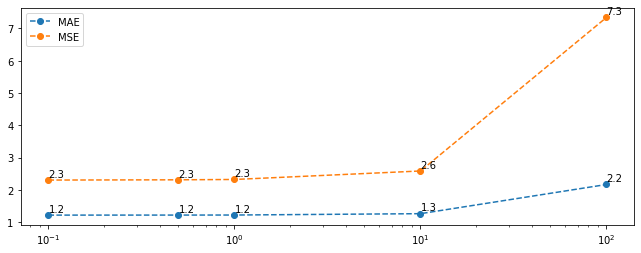

In [8]:
# step 7:(Adjusting)

MAE = []
MSE = []

for a in [0.1, .5, 1, 10, 100]:
    model = Ridge(alpha=a)
    # step 5:
    model.fit(X_train, y_train)
    # step 6:
    y_pred = model.predict(X_test)
    MAE.append(mean_absolute_error(y_test, y_pred))
    MSE.append(mean_squared_error(y_test, y_pred))

    
plt.figure(figsize=(11,4))    
plt.plot([0.1, .5, 1, 10, 100], MAE, '--o', label='MAE')

for a,b in zip([0.1, .5, 1, 10, 100], MAE): 
    plt.text(a, b+0.1, str(round(b,1)))
    
plt.plot([0.1, .5, 1, 10, 100], MSE, '--o', label='MSE')

for a,b in zip([0.1, .5, 1, 10, 100], MSE): 
    plt.text(a, b+0.1, str(round(b,1)))

plt.xscale('log')
plt.legend();

***Final Evaluation***

In [9]:
model = Ridge(alpha=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MAE:',round(mean_absolute_error(y_test, y_pred),3))
print('MSE:',round(mean_squared_error(y_test, y_pred),3))

MAE: 1.217
MSE: 2.319


**Note**: We previously showed RidgeCV can do this for us, but the purpose of this notebook is to generalize the CV process for any model

---
---

### Train | Validation | Test Split Procedure


This is often also called a "hold-out" set, since you should not adjust parameters based on the final test set, but instead use it *only* for reporting final expected performance.

0. **Clean** and **adjust** data as necessary for X and y
1. **Split Data** in **Train/Validation/Test** for both X and y
2. **Fit/Train** Scaler on **Training** X Data
3. **Scale X Eval** Data
4. **Create** Model
5. **Fit/Train** Model on X Train Data
6. **Evaluate Model** on X **Evaluation** Data (by creating predictions and comparing to Y_eval)
7. **Adjust Parameters** as Necessary and repeat steps 5 and 6
8. Get **final metrics** on **Test set** (not allowed to go back and adjust after this!)

In [10]:
# step 0 is not needed here 

# step 1:
X = df.drop('sales', axis=1)
y = df['sales']

In [11]:
# step 2:
#####################################################################
#### SPLIT TWICE! Here we create TRAIN | VALIDATION | TEST  #########
#####################################################################

# 70% of data is training data, set aside other 30%
from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101)

# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

In [12]:
# step 3:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

In [13]:
# step 4:
from sklearn.linear_model import Ridge
model = Ridge(alpha=100)


# step 5:
model.fit(X_train, y_train)


# step 6:
y_pred = model.predict(X_eval)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_eval, y_pred))
print(mean_squared_error(y_eval, y_pred))

2.175424374439987
7.320101458823869


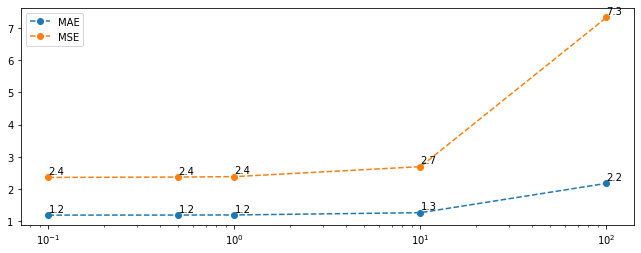

In [14]:
# step 7:(Adjusting)

MAE = []
MSE = []

for a in [0.1, .5, 1, 10, 100]:
    model = Ridge(alpha=a)
    # step 5:
    model.fit(X_train, y_train)
    # step 6:
    y_pred = model.predict(X_eval)
    MAE.append(mean_absolute_error(y_eval, y_pred))
    MSE.append(mean_squared_error(y_eval, y_pred))

    
plt.figure(figsize=(11,4))    
plt.plot([0.1, .5, 1, 10, 100], MAE, '--o', label='MAE')

for a,b in zip([0.1, .5, 1, 10, 100], MAE): 
    plt.text(a, b+0.1, str(round(b,1)))
    
plt.plot([0.1, .5, 1, 10, 100], MSE, '--o', label='MSE')

for a,b in zip([0.1, .5, 1, 10, 100], MSE): 
    plt.text(a, b+0.1, str(round(b,1)))

plt.xscale('log')
plt.legend();

**Final Eval:**(No test data leakage or bias)

In [15]:
model = Ridge(alpha=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MAE:',round(mean_absolute_error(y_test, y_pred),3))
print('MSE:',round(mean_squared_error(y_test, y_pred),3))

MAE: 1.239
MSE: 2.254


---
---
---

# Two Methods of Cross Validation

<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png' width=400 height=200>

## Cross Validation with `cross_val_score`
---

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = Ridge(alpha=100)

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)

### for scoring check this link:
# https://scikit-learn.org/stable/modules/model_evaluation.html

scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [19]:
abs(scores.mean())

8.215396464543607

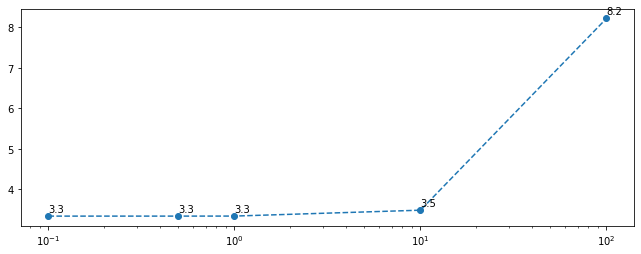

In [20]:
# Adjusting Model

MSE = []
for a in [0.1, .5, 1, 10, 100]:
    model = Ridge(alpha=a)

    scores = cross_val_score(estimator=model, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)

    MSE.append(abs(scores.mean()))
    
plt.figure(figsize=(11,4))   
plt.plot([0.1, .5, 1, 10, 100], MSE, '--o')

for a,b in zip([0.1, .5, 1, 10, 100], MSE): 
    plt.text(a, b+0.1, str(round(b,1)))

plt.xscale('log');

In [21]:
model = Ridge(alpha=1)
scores = cross_val_score(estimator=model, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)
abs(scores.mean())

3.344839296530695

**Final Eval:**

In [22]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

2.3190215794287514

---
---

## Cross Validation with `cross_validate`
---

The cross_validate function differs from cross_val_score in two ways:

   * It allows specifying **multiple metrics** for evaluation.

   * It returns a **dict** containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

For single metric evaluation, where the scoring parameter is a string, callable or None, the keys will be - `['test_score', 'fit_time', 'score_time']`

And for multiple metric evaluation, the return value is a dict with the following keys - `['test_<scorer1_name>', 'test_<scorer2_name>', 'test_<scorer...>', 'fit_time', 'score_time']`

`return_train_score` is set to `False` by default to save computation time. To evaluate the scores on the training set as well you need to set it to `True`.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model = Ridge(alpha=100)

In [25]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator=model,X=X_train, y=y_train, cv=5,
                        scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'])
scores

{'fit_time': array([0.00199556, 0.00099611, 0.00102997, 0.00099874, 0.00199533]),
 'score_time': array([0.00099778, 0.00099635, 0.        , 0.00096345, 0.        ]),
 'test_neg_mean_absolute_error': array([-2.31243044, -1.74653361, -2.56211701, -2.01873159, -2.27951906]),
 'test_neg_mean_squared_error': array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
         -8.38562723])}

In [26]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.001996,0.000998,-2.312430,-9.325530
1,0.000996,0.000996,-1.746534,-4.944962
2,0.001030,0.000000,-2.562117,-11.396652
3,0.000999,0.000963,-2.018732,-7.024211
4,0.001995,0.000000,-2.279519,-8.385627


In [27]:
pd.DataFrame(scores).mean()

fit_time                        0.001403
score_time                      0.000592
test_neg_mean_absolute_error   -2.183866
test_neg_mean_squared_error    -8.215396
dtype: float64

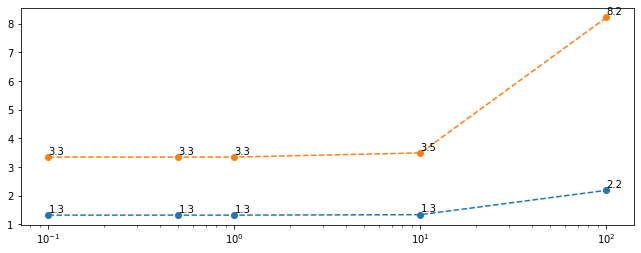

In [28]:
# Adjusting Model

MSE = []
MAE = []
for a in [0.1, .5, 1, 10, 100]:
    model = Ridge(alpha=a)

    scores = cross_validate(estimator=model,X=X_train, y=y_train, cv=5,
                            scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'])

    MAE.append(abs(pd.DataFrame(scores).mean()['test_neg_mean_absolute_error']))
    MSE.append(abs(pd.DataFrame(scores).mean()['test_neg_mean_squared_error']))
    
plt.figure(figsize=(11,4))
plt.plot([0.1, .5, 1, 10, 100], MAE, '--o')
plt.plot([0.1, .5, 1, 10, 100], MSE, '--o')

for a,b in zip([0.1, .5, 1, 10, 100], MSE): 
    plt.text(a, b+0.1, str(round(b,1)))
for a,b in zip([0.1, .5, 1, 10, 100], MAE): 
    plt.text(a, b+0.1, str(round(b,1)))

plt.xscale('log');

**Final Evaluation**

In [29]:
model = Ridge(alpha=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

2.3190215794287514

---
---
---

$$ ________________cross validation________________ $$


# Grid Search 
---

Grid search, in my opinion is the best way for finding the best hyperparameters because it will go through all combinations of parameters that you want.

A search consists of:

* an estimator (regressor or classifier such as sklearn.svm.SVC());
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme 
* a score function.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()

In [32]:
param_grid = {
    'alpha': [0.1, 0.5, 0.9, 1, 10, 100],
    'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9, 1] 
}

from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(estimator=model, param_grid=param_grid,
                          scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                          cv=5, 
                          verbose=1, # it just explains more when is higher
                          refit='neg_mean_squared_error'  # to find the best params of this metric when having multiple metrics
                         )

In [33]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 0.9, 1, 10, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [34]:
print(grid_model.best_estimator_,'\n',
     grid_model.best_params_,'\n',
     grid_model.best_score_)

ElasticNet(alpha=0.1, l1_ratio=1) 
 {'alpha': 0.1, 'l1_ratio': 1} 
 -3.2927601581001076


In [35]:
pd.DataFrame(grid_model.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
0,0.002168,0.000461,0.001060,0.000547,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-1.560429,-1.024838,-1.521026,...,0.241766,6,-3.453021,-1.405190,-5.789125,-2.187302,-4.645576,-3.496043,1.591601,6
1,0.002068,0.000141,0.001373,0.000371,0.1,0.3,"{'alpha': 0.1, 'l1_ratio': 0.3}",-1.558314,-1.023941,-1.497815,...,0.233453,5,-3.386789,-1.419619,-5.691296,-2.170784,-4.548123,-3.443322,1.548670,5
2,0.001412,0.000510,0.001067,0.000508,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-1.555920,-1.023903,-1.475724,...,0.223621,4,-3.325440,-1.427522,-5.595610,-2.163089,-4.451679,-3.392668,1.506827,4


We can search for better parameters based on the results

In [36]:
param_grid = {
    'alpha': [0.2, 0.1, .09, .05, 0.01],
    'l1_ratio':[0.1, 0.9, 0.95, 0.99, 1] 
}

grid_model = GridSearchCV(estimator=model, param_grid=param_grid,
                         scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                         cv=5, verbose=1, refit='neg_mean_squared_error')


In [37]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.2, 0.1, 0.09, 0.05, 0.01],
                         'l1_ratio': [0.1, 0.9, 0.95, 0.99, 1]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
             verbose=1)

In [38]:
print(grid_model.best_estimator_,'\n',
     grid_model.best_params_,'\n',
     grid_model.best_score_)

ElasticNet(alpha=0.09, l1_ratio=1) 
 {'alpha': 0.09, 'l1_ratio': 1} 
 -3.292571495909358


In [39]:
y_pred = grid_model.predict(X_test)

In [40]:
mean_squared_error(y_test, y_pred)

2.3768486062285006